<a href="https://colab.research.google.com/github/Sculllian07/Xebia-Mini-Project/blob/main/job_recommendation_sample1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skill-Based Job Recommendation System
This notebook recommends jobs based on your resume using AI (TF-IDF + Cosine Similarity).

In [3]:
!pip install nltk scikit-learn pandas matplotlib


In [4]:
from google.colab import files
uploaded = files.upload()


Saving jobs.csv to jobs.csv
Saving resume.txt to resume.txt
Saving skills.csv to skills.csv


In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    words = text.lower().split()
    filtered = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(filtered)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
job_df = pd.read_csv("jobs.csv")
skill_df = pd.read_csv("skills.csv")
job_df['Processed'] = job_df['Description'].apply(preprocess)


In [7]:
with open("resume.txt", "r") as file:
    resume_text = file.read()

processed_resume = preprocess(resume_text)


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

corpus = job_df['Processed'].tolist() + [processed_resume]
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(corpus)

similarity_scores = cosine_similarity(vectors[-1], vectors[:-1]).flatten()
job_df['Score'] = similarity_scores


In [9]:
top_jobs = job_df.sort_values(by='Score', ascending=False).head(5)
print(top_jobs[['Job Title', 'Score']])


           Job Title     Score
0      Web Developer  0.289748
1       Data Analyst  0.289314
2  Software Engineer  0.119714
4    DevOps Engineer  0.035053
3    Project Manager  0.017807


In [10]:
resume_words = set(processed_resume.split())

print("\nSkill Recommendations:")
for job in top_jobs['Job Title']:
    skills = skill_df[skill_df['Job Title'] == job]['Skills'].values
    if len(skills) == 0:
        continue
    skill_list = [s.strip().lower() for s in skills[0].split(',')]
    missing = [s for s in skill_list if stemmer.stem(s) not in resume_words]
    print(f"\n🔹 For Job: {job}\n    Missing Skills: {missing[:5]}")



Skill Recommendations:

🔹 For Job: Web Developer
    Missing Skills: ['html', 'css', 'javascript']

🔹 For Job: Data Analyst
    Missing Skills: ['python', 'pandas', 'matplotlib']

🔹 For Job: Software Engineer
    Missing Skills: ['java', 'c++', 'algorithms', 'data structures', 'unit testing']

🔹 For Job: DevOps Engineer
    Missing Skills: ['aws', 'docker', 'kubernetes', 'ci/cd']

🔹 For Job: Project Manager
    Missing Skills: ['agile', 'jira', 'team leadership', 'stakeholder communication']


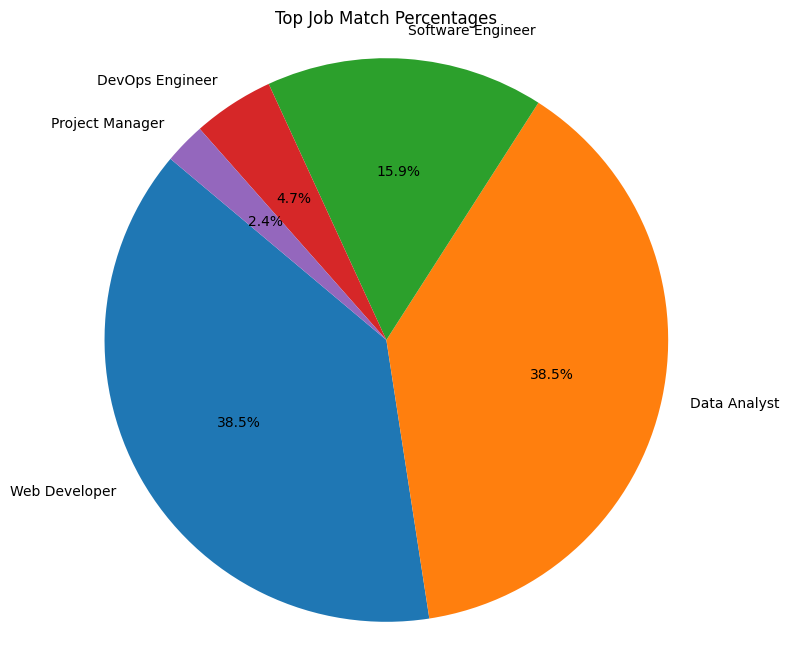

In [11]:
import matplotlib.pyplot as plt

labels = top_jobs['Job Title']
scores = top_jobs['Score']

plt.figure(figsize=(8, 8))
plt.pie(scores, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top Job Match Percentages')
plt.axis('equal')
plt.show()


In [12]:
import numpy as np

# Final line to print most suitable job(s) using proper grammar
top_score = top_jobs['Score'].max()
best_jobs = top_jobs[np.isclose(top_jobs['Score'], top_score)]['Job Title'].tolist()

if len(best_jobs) == 1:
    print(f"Most suitable job for you is: {best_jobs[0]}")
else:
    joined_jobs = " or ".join(best_jobs)
    print(f"Most suitable job for you is: {joined_jobs}")


Most suitable job for you is: Web Developer
